In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ngrad(f,X):
    h = 1e-6
    dx = (f(X[0]+h, X[1]) -f(X[0]-h, X[1]))/(2*h)
    dy = (f(X[0], X[1]+h) -f(X[0], X[1]-h))/(2*h)
    return np.array([dx,dy])

In [3]:
class NAG:
    def __init__(self, lr=0.01, beta=0.9):
        self.lr = lr
        self.beta = beta
        self.v = np.zeros(2)

    def update(self, f, X):
        self.v = self.beta * self.v - self.lr * ngrad(f, X)
        return np.array(X) + self.v

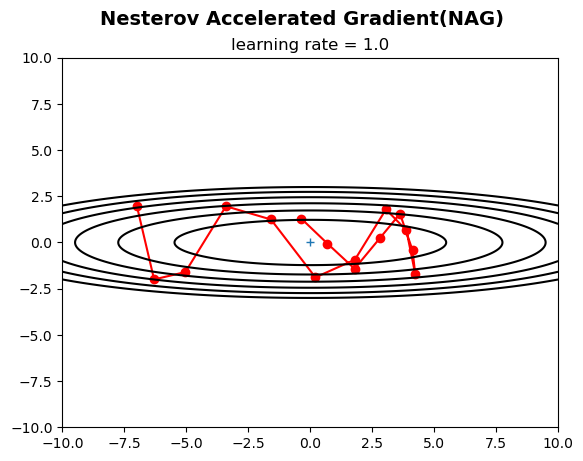

In [4]:
lr = 1.0
initial_position=(-7,2)
iter=15

pts = [initial_position]
optimizer = NAG(lr)
f = lambda x,y : 1/20*x**2+ (y**2)

for i in range(iter):
    pts.append(optimizer.update(f, pts[-1]))

fig = plt.figure()
fig.suptitle('Nesterov Accelerated Gradient(NAG)', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.set_title('learning rate = %s' %lr)

xdata=[pt[0] for pt in pts]
ydata=[pt[1] for pt in pts]
plt.plot(xdata, ydata, 'o-', color="red")

x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
levels = np.arange(0, 10, 1.5)
plt.contour(X, Y, f(X,Y), levels, colors='black')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')

plt.show()